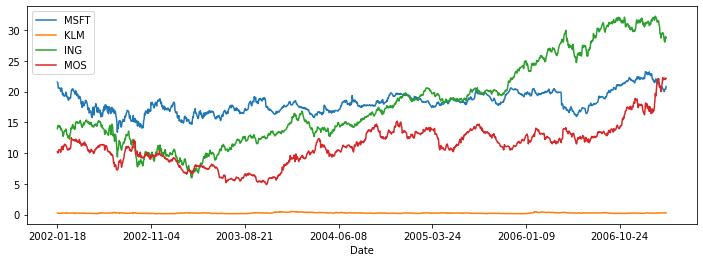

In [1]:
import cvxpy as cp
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df_stocks = pd.read_csv("./../stocks.csv").iloc[500:1800]
df_stocks.set_index('Date').plot(figsize=(12, 4));

In [2]:
df_returns = df_stocks.set_index('Date').diff()
df_returns.mean()

MSFT   -0.000547
KLM     0.000008
ING     0.011386
MOS     0.009176
dtype: float64

In [3]:
df_returns.std()

MSFT    0.281751
KLM     0.022894
ING     0.313000
MOS     0.280967
dtype: float64

In [4]:
df_returns.cov()

,MSFT,KLM,ING,MOS
MSFT,0.079384,0.000037,0.042518,0.018168
KLM,0.000037,0.000524,-0.000081,-0.000240
ING,0.042518,-0.000081,0.097969,0.026846
MOS,0.018168,-0.000240,0.026846,0.078942


In [5]:
mean_stock = df_returns.mean().values
cov_stock = df_returns.cov().values

x = cp.Variable(len(mean_stock))

stock_return = mean_stock @ x
stock_risk = cp.quad_form(x, cov_stock)
p = 1

objective = cp.Maximize(stock_return - p *stock_risk)
constraints = [x >= 0, cp.sum(x) == 1]
prob = cp.Problem(objective=objective, constraints=constraints)
prob.solve(), x.value

(6.289347782495285e-05,
 array([-1.40643068e-24,  9.00502860e-01,  4.98638391e-02,  4.96333004e-02]))

In [6]:
def solve_problem(dataf, risk_pref=0.1):
    mean_stock = dataf.diff().mean().values
    cov_stock = dataf.diff().cov().values

    x = cp.Variable(len(mean_stock))

    stock_return = mean_stock.T @ x
    stock_risk = cp.quad_form(x, cov_stock)

    objective = cp.Maximize(stock_return - risk_pref * stock_risk)
    constraints = [cp.sum(x) == 1, x >= 0]
    prob = cp.Problem(objective=objective, constraints=constraints)
    return prob.solve(), x.value


steps = np.linspace(0.01, 2, 100)
x_vals = np.zeros((steps.shape[0], 4))
profit = np.zeros(steps.shape[0])
for i, r in enumerate(steps):
    p, xs = solve_problem(df_stocks.set_index('Date'), risk_pref=r)
    x_vals[i, :] = xs
    profit[i] = p

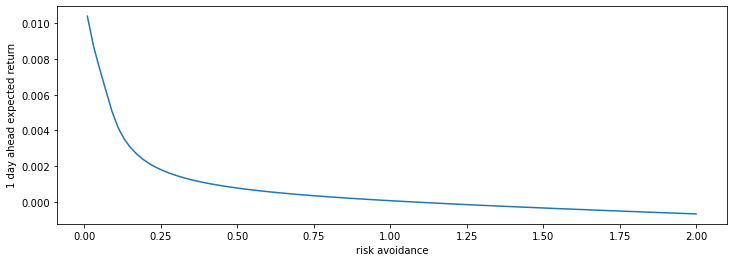

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(steps, profit)
plt.xlabel("risk avoidance")
plt.ylabel("1 day ahead expected return");

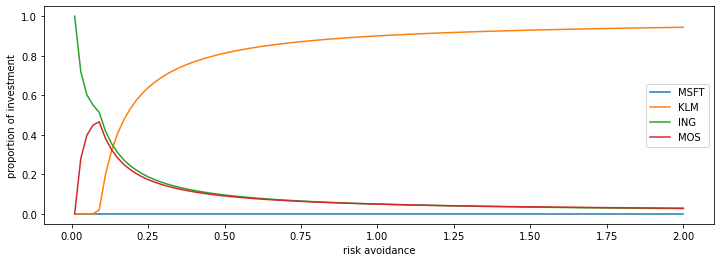

In [8]:
plt.figure(figsize=(12, 4))
tickers = ["MSFT", "KLM", "ING", "MOS"]
for idx, stock in enumerate(tickers):
    plt.plot(steps, x_vals[:, idx], label=stock)
plt.xlabel("risk avoidance")
plt.ylabel("proportion of investment")
plt.legend();